In [ ]:
print("Advanced Computer Vision and Video Analytics_Lab5_Harish Sivakumar_E22CSEU0033")

Advanced Computer Vision and Video Analytics_Lab5_Harish Sivakumar_E22CSEU0033


<h3>Task 1 i</h3>

<h3> Step 1: Install and Import Dependencies</h3>

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
import heapq
from collections import defaultdict
from google.colab import files

<h3>Step 2: Upload an Image (Any Format)</h3>

In [3]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"Uploaded Image: {image_path}")

Saving NaturePNG.png to NaturePNG.png
Uploaded Image: NaturePNG.png


<h3>Step 3: Display the Original Image</h3>

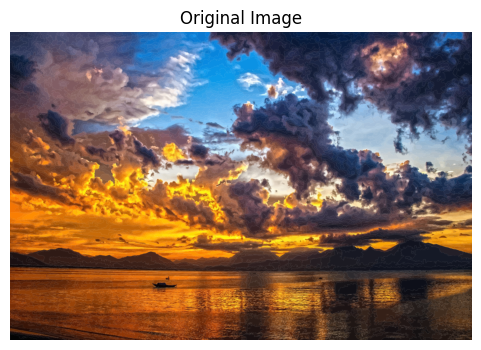

In [4]:
def show_image(title, img_data, cmap=None):
    plt.figure(figsize=(6, 4))
    plt.imshow(img_data, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

original_image = Image.open(image_path)
show_image("Original Image", original_image)

<h3> Step 4: PNG Compression (Lossless)</h3>

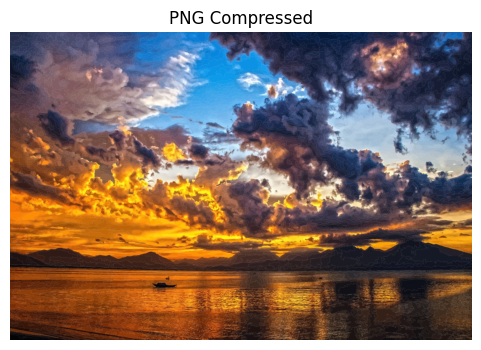

In [5]:
png_buffer = io.BytesIO()
original_image.save(png_buffer, format="PNG", optimize=True)

png_compressed = Image.open(png_buffer)
show_image("PNG Compressed", png_compressed)

<h3> Step 5: GIF Compression (Lossless)</h3>

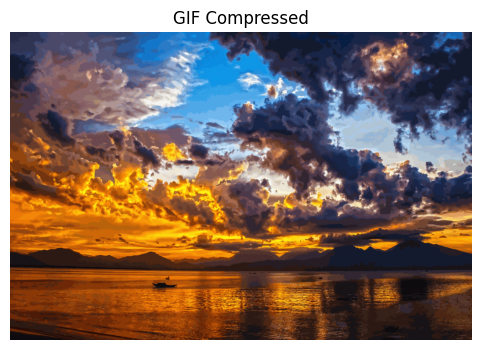

In [6]:
gif_buffer = io.BytesIO()
original_image.convert("P", palette=Image.ADAPTIVE, colors=256).save(gif_buffer, format="GIF", optimize=True)

gif_compressed = Image.open(gif_buffer)
show_image("GIF Compressed", gif_compressed)

<h3> Step 6: TIFF Compression (LZW - Lossless)</h3>

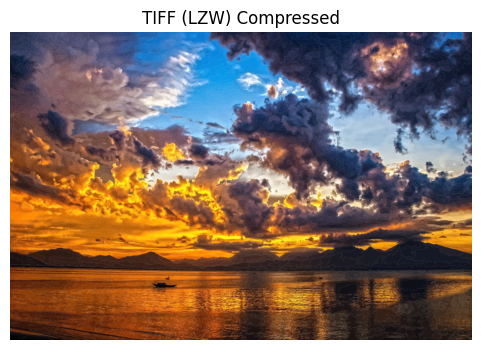

In [7]:
tiff_buffer = io.BytesIO()
original_image.save(tiff_buffer, format="TIFF", compression="tiff_lzw")

tiff_compressed = Image.open(tiff_buffer)
show_image("TIFF (LZW) Compressed", tiff_compressed)

<h3> Step 7: Run-Length Encoding (RLE)</h3>

RLE Compressed Data (Snippet): [(46, 75), (50, 12), (51, 1), (52, 9), (53, 1), (55, 1), (56, 1), (55, 1), (57, 2), (59, 8), (63, 1), (62, 11), (64, 1), (67, 3), (69, 1), (71, 33), (72, 1), (76, 1), (77, 36), (78, 1)]


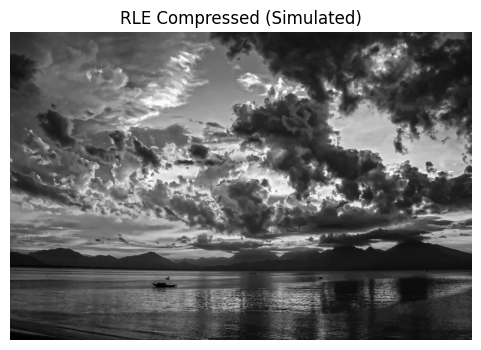

In [8]:
def rle_encode(img_array):
    pixels = img_array.flatten()
    encoded_pixels = []
    prev_pixel = pixels[0]
    count = 1

    for pixel in pixels[1:]:
        if pixel == prev_pixel:
            count += 1
        else:
            encoded_pixels.append((prev_pixel, count))
            prev_pixel = pixel
            count = 1
    encoded_pixels.append((prev_pixel, count))
    return encoded_pixels

gray_image = original_image.convert("L")
gray_array = np.array(gray_image)

rle_compressed = rle_encode(gray_array)
print("RLE Compressed Data (Snippet):", rle_compressed[:20])
show_image("RLE Compressed (Simulated)", gray_array, cmap="gray")

<h3> Step 8: Huffman Encoding (Lossless)</h3>

Huffman Encoded Data (Snippet): 1100110110011011001101100110110011011001101100110110011011001101100110110011011001101100110110011011


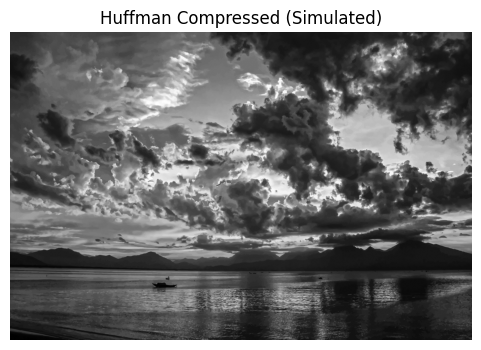

In [9]:
class HuffmanNode:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(frequencies):
    heap = [HuffmanNode(symbol, freq) for symbol, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

def generate_huffman_codes(node, prefix="", code_dict={}):
    if node is not None:
        if node.symbol is not None:
            code_dict[node.symbol] = prefix
        generate_huffman_codes(node.left, prefix + "0", code_dict)
        generate_huffman_codes(node.right, prefix + "1", code_dict)
    return code_dict

gray_pixels = gray_array.flatten()
pixel_frequencies = defaultdict(int)
for pixel in gray_pixels:
    pixel_frequencies[pixel] += 1

huffman_root = build_huffman_tree(pixel_frequencies)
huffman_codes = generate_huffman_codes(huffman_root)

huffman_encoded_data = "".join(huffman_codes[pixel] for pixel in gray_pixels)
print("Huffman Encoded Data (Snippet):", huffman_encoded_data[:100])

show_image("Huffman Compressed (Simulated)", gray_array, cmap="gray")

<h3>Step 9: Lempel-Ziv-Welch (LZW) Compression</h3>

LZW Compressed Data (Snippet): [46, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 263, 50, 268, 269, 270, 268, 51, 52, 274]


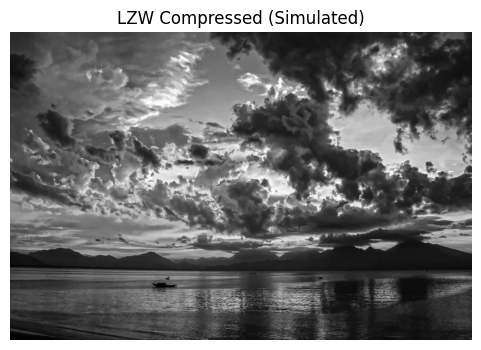

In [10]:
def lzw_compress(data):
    dictionary = {chr(i): i for i in range(256)}
    current_code = 256
    w = ""
    compressed_data = []

    for char in data:
        wc = w + char
        if wc in dictionary:
            w = wc
        else:
            compressed_data.append(dictionary[w])
            dictionary[wc] = current_code
            current_code += 1
            w = char

    if w:
        compressed_data.append(dictionary[w])

    return compressed_data

image_string = "".join(chr(pixel) for pixel in gray_array.flatten())
lzw_compressed = lzw_compress(image_string)
print("LZW Compressed Data (Snippet):", lzw_compressed[:20])

show_image("LZW Compressed (Simulated)", gray_array, cmap="gray")

<h3>ii</h3>

<h3>Step 1: Install and Import Dependencies</h3>

In [36]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
from sklearn.decomposition import PCA
from google.colab import files

<h3>Step 2: Upload an Image</h3>

In [14]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"Uploaded Image: {image_path}")

Saving NaturePNG.png to NaturePNG (1).png
Uploaded Image: NaturePNG (1).png


<h3> Step 3: Display the Original Image</h3>

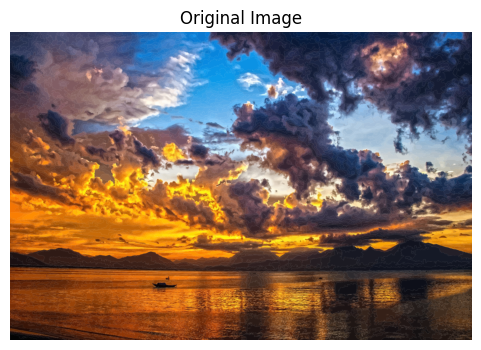

In [15]:
def show_image(title, img_data, cmap=None):
    plt.figure(figsize=(6, 4))
    plt.imshow(img_data, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

original_image = Image.open(image_path)
show_image("Original Image", original_image)

<h3> Step 4: JPEG Compression (Lossy) - T1.1</h3>

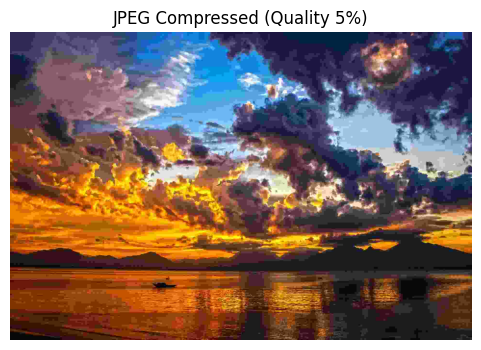

In [20]:
jpeg_buffer = io.BytesIO()
original_image = original_image.convert("RGB")
original_image.save(jpeg_buffer, format="JPEG", quality=5)

jpeg_compressed = Image.open(jpeg_buffer)
show_image("JPEG Compressed (Quality 5%)", jpeg_compressed)

<h3>Step 5: WebP Compression (Google's Lossy Format)</h3>

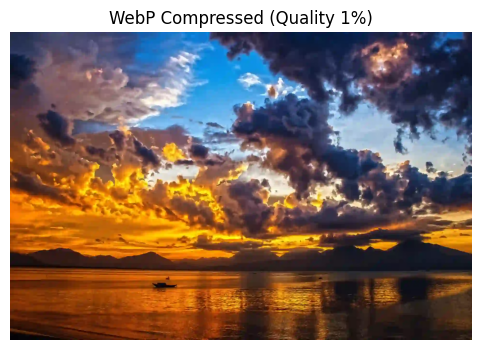

In [29]:
webp_buffer = io.BytesIO()
original_image.save(webp_buffer, format="WEBP", quality=1)

webp_compressed = Image.open(webp_buffer)
show_image("WebP Compressed (Quality 1%)", webp_compressed)

<h3>Step 6: Discrete Cosine Transform (DCT) Compression</h3>

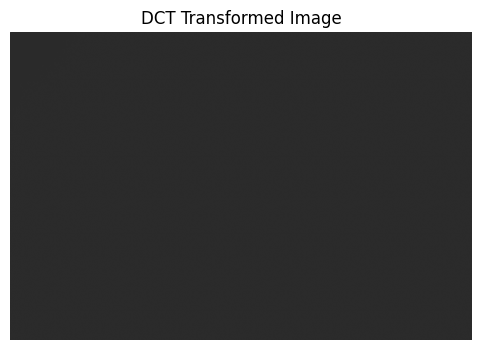

In [33]:
def apply_dct(img):
    img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    img_float = np.float32(img_gray) / 255.0
    dct_transformed = cv2.dct(img_float)
    return dct_transformed

dct_image = apply_dct(original_image)
show_image("DCT Transformed Image", dct_image, cmap="gray")

<h3>Step 7: JPEG 2000 Compression (Wavelet Transform)</h3>

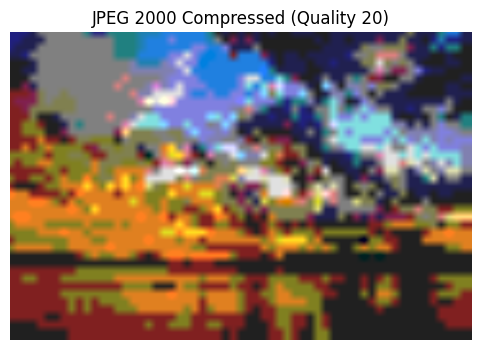

In [34]:
jpeg2000_buffer = io.BytesIO()
original_image.save(jpeg2000_buffer, format="JPEG2000", quality_mode="dB", quality_layers=[20])

jpeg2000_compressed = Image.open(jpeg2000_buffer)
show_image("JPEG 2000 Compressed (Quality 20)", jpeg2000_compressed)

<h3>Step 8: Principal Component Analysis (PCA) Compression</h3>

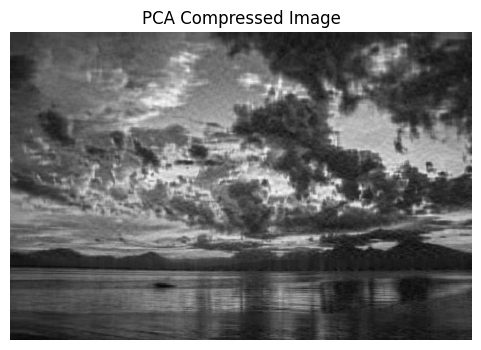

In [37]:
def apply_pca(img, num_components=50):
    img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    img_flat = img_gray.reshape(-1, img_gray.shape[1])

    pca = PCA(n_components=num_components)
    transformed = pca.fit_transform(img_flat)
    restored = pca.inverse_transform(transformed)

    return restored.reshape(img_gray.shape)

pca_compressed = apply_pca(original_image, num_components=50)
show_image("PCA Compressed Image", pca_compressed, cmap="gray")

<h3>Task 2</h3>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_cat, y_val_cat, y_train, y_val = train_test_split(
    x_train, y_train_cat, y_train, test_size=0.2, random_state=42
)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_val, y_val_cat))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9005 - loss: 0.3210 - val_accuracy: 0.9820 - val_loss: 0.0584
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9848 - loss: 0.0472 - val_accuracy: 0.9873 - val_loss: 0.0389
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9905 - val_loss: 0.0358
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9859 - val_loss: 0.0504
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9961 - loss: 0.0123 - val_accuracy: 0.9872 - val_loss: 0.0483
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9970 - loss: 0.0086 - val_accuracy: 0.9894 - val_loss: 0.0447
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9976 - loss: 0.00

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9877 - loss: 0.0593
Test Accuracy: 0.9900


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0593
Test Loss: 0.0472
Test Accuracy: 0.9900


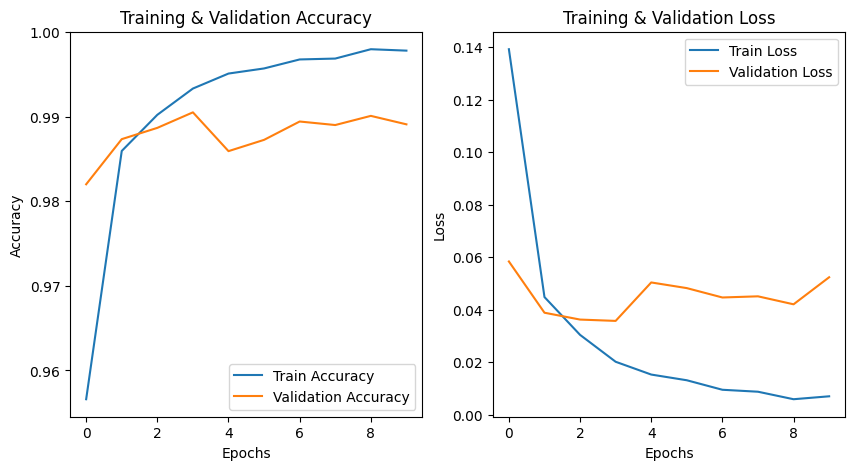

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-Score: {report['weighted avg']['f1-score']:.4f}")

Precision: 0.9900
Recall: 0.9900
F1-Score: 0.9900


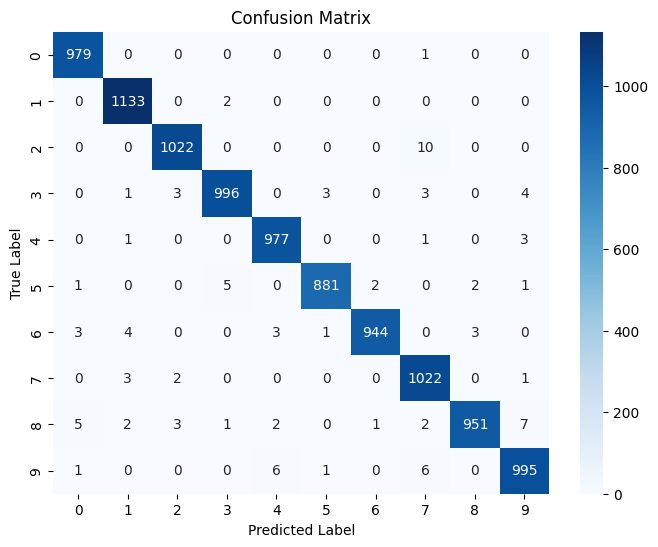

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

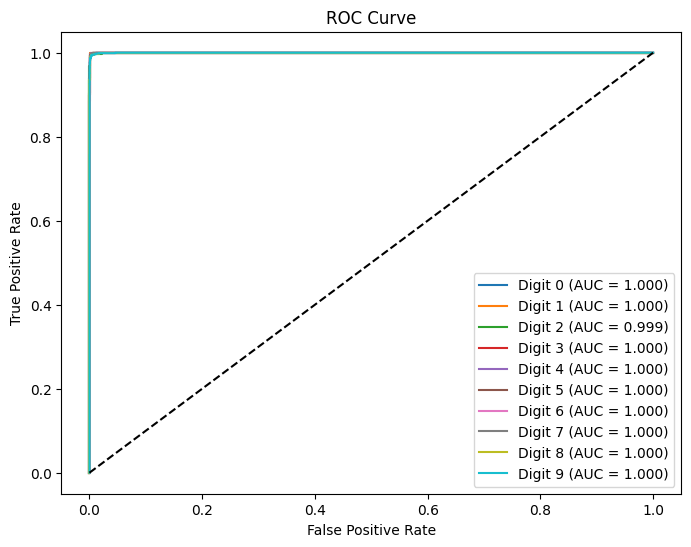

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

CIFAR Dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train, x_val, y_train_cat, y_val_cat, y_train, y_val = train_test_split(
    x_train, y_train_cat, y_train, test_size=0.2, random_state=42
)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_cat, epochs=15, validation_data=(x_val, y_val_cat), batch_size=64)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2804 - loss: 1.9234 - val_accuracy: 0.5116 - val_loss: 1.3234
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4992 - loss: 1.3881 - val_accuracy: 0.6123 - val_loss: 1.1049
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5897 - loss: 1.1677 - val_accuracy: 0.6535 - val_loss: 0.9712
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6376 - loss: 1.0387 - val_accuracy: 0.6836 - val_loss: 0.9169
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6757 - loss: 0.9391 - val_accuracy: 0.6972 - val_loss: 0.8521
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6954 - loss: 0.8693 - val_accuracy: 0.7168 - val_loss: 0.8173
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7220 - loss: 0.7961 - val_accuracy: 0.7263 - val_loss: 0.7950
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7416 - loss: 0.7446 - val_accuracy: 0.

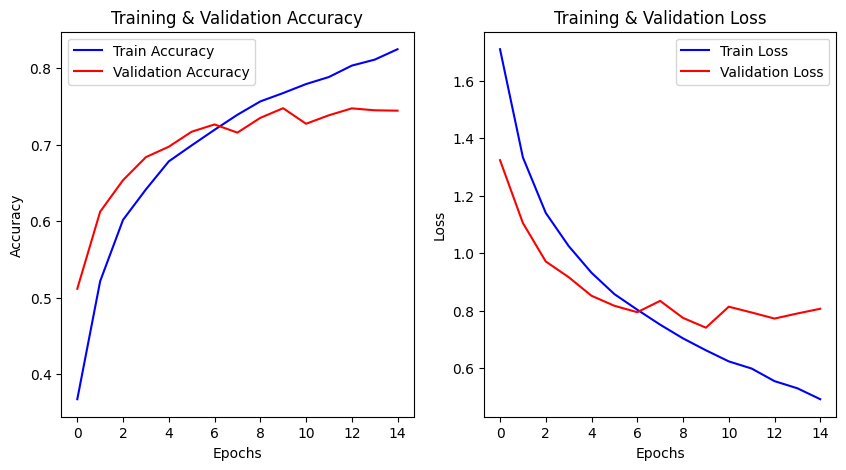

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7495 - loss: 0.8192
Test Accuracy: 0.7429


In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-Score: {report['weighted avg']['f1-score']:.4f}")

Precision: 0.7440
Recall: 0.7429
F1-Score: 0.7397


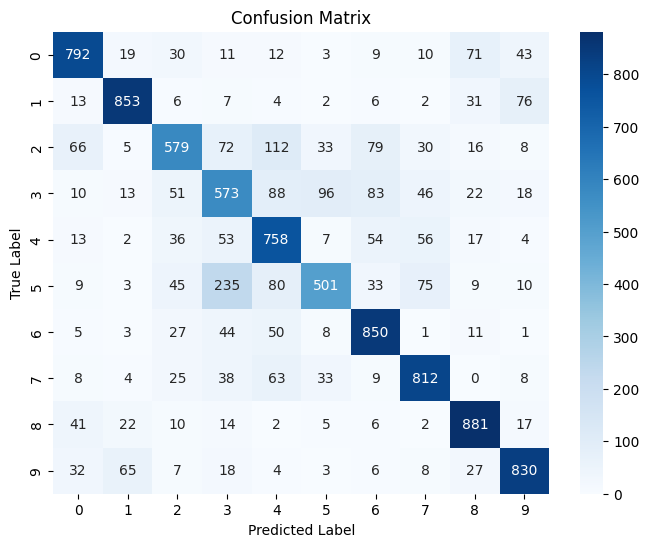

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

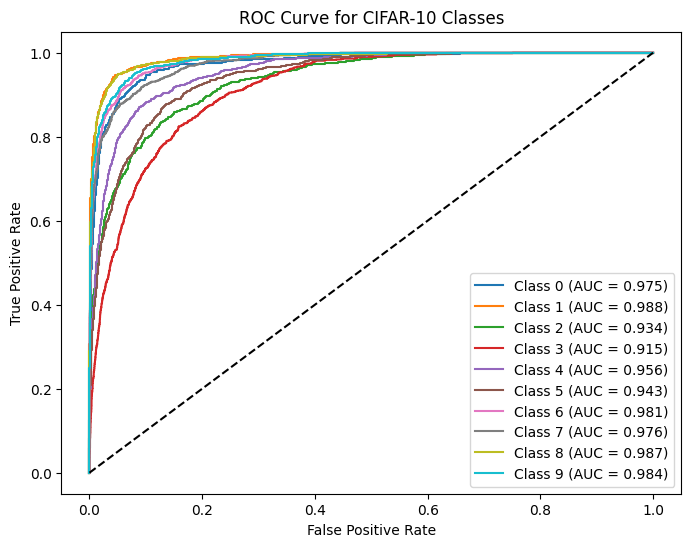

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CIFAR-10 Classes")
plt.legend()
plt.show()